<a href="https://colab.research.google.com/github/Jholman22/Procesamiento_Digital_de_Senales/blob/main/Fouriere_muestras_no_uniformes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fourier cuando las muestras no están uniformemente espaciadas**
Cuando tus datos no están muestreados uniformemente (o sea, los tiempos entre muestras no son iguales), la Transformada de Fourier normal no funciona directamente como en señales uniformes.
Tienes varias opciones:


1. Interpolar primero
Puedes interpolar tus datos a un grid de tiempo uniforme (por ejemplo, usando interpolación lineal o splines).

Luego aplicas una FFT normal.

Peeero: si los datos son muy irregulares o la frecuencia de muestreo efectiva varía mucho, esto puede meter errores.

2. Usar una transformación adaptada: NFFT o Lomb-Scargle
NFFT (Non-uniform Fast Fourier Transform): es una versión especial de la FFT que trabaja directamente con tiempos no uniformes.

Lomb-Scargle periodogram: muy usado en astronomía, sirve para encontrar frecuencias dominantes en datos desiguales.

Es como una especie de Fourier, pero optimizado para irregularidad.

También te permite detectar frecuencias con mejor precisión si el muestreo es muy disparejo.

3. Formulación directa
$$
X(f) = \sum_{n=0}^{N-1} x(t_n) \, e^{-i 2\pi f t_n}
$$


donde:
- \( X(f) \) es la transformada en la frecuencia \( f \),
- \( x(t_n) \) son las muestras de la señal,
- \( t_n \) son los instantes de tiempo no uniformemente espaciados,
- \( N \) es el número total de muestras.


Aquí, simplemente aplicas la definición general de la Transformada de Fourier evaluando en los tiempos reales
𝑡
𝑛
t
n
​
 .

No es rápido como la FFT, pero funciona bien para un conjunto de frecuencias específico.





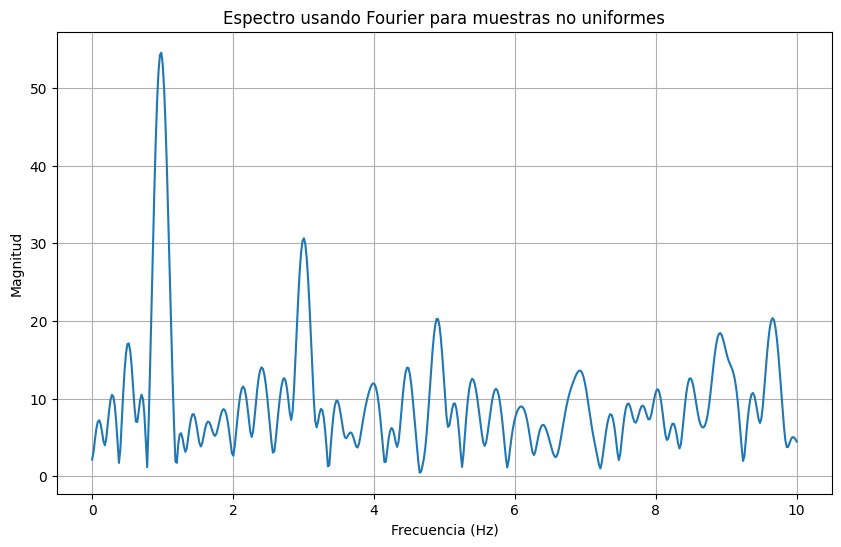

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos simulados: tiempos NO uniformemente espaciados
np.random.seed(0)
t = np.sort(np.random.rand(100)) * 5  # tiempos entre 0 y 5 segundos, no uniformes

# Señal: una suma de senoidales (frecuencias 1 Hz y 3 Hz)
signal = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 3 * t)

# Definimos las frecuencias donde queremos calcular la transformada
f = np.linspace(0, 10, 500)  # 0 a 10 Hz, 500 puntos

# Aplicamos la transformada tipo suma (directa)
X = np.array([np.sum(signal * np.exp(-1j * 2 * np.pi * freq * t)) for freq in f])

# Graficamos el espectro
plt.figure(figsize=(10,6))
plt.plot(f, np.abs(X))
plt.title("Espectro usando Fourier para muestras no uniformes")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()

